## Hamza Mustafa
### Final Project

In [230]:
# Load Packages
import os
import math
import random
import numpy as np
import pandas as pd
import sklearn as sk

### The goal of this code is to identify countries as food suppliers (with extraneous resources) or food receivers (those with food scarcity)

In [231]:
# We manually added some information to the dataset including GDP, infant mortality rate, and life expectancy

# Extended Dataset path
dataset_path = "processed_data/Extended_Dataset.csv"

# Load csv file into a dataframe
df = pd.read_csv(dataset_path)

#Select desired columns
clean_df = df[['Country', 'Tons of food scarcity', 'Tons of surplus food']].copy()

clean_df['sub'] = clean_df['Tons of surplus food']-clean_df['Tons of food scarcity']

clean_df.head()

,Country,Tons of food scarcity,Tons of surplus food,sub
0,Afghanistan,18414379,1852067.5,-16562311.5
1,Albania,597953,141775.0,-456178.0
2,Algeria,5572676,2295944.5,-3276731.5
3,Andorra,0,3742.5,3742.5
4,Angola,17532405,1833639.0,-15698766.0


In [232]:

negative_values = clean_df[clean_df['sub'] < 0]['sub']

# Find maximum and minimum values among negative numbers
max_negative = negative_values.max()
min_negative = negative_values.min()

positive_values = clean_df[clean_df['sub'] >= 0]['sub']
max_positive = positive_values.max()
min_positive = positive_values.min()

a = 0.01
b = 3

c = -3
d = -0.01

clean_df['normalized_sub'] = clean_df['sub'].apply(lambda x: ((x - min_positive) / (max_positive - min_positive)) * (b - a) + a if x >= 0 else (x - min_negative) / (max_negative - min_negative) * (d - c) + c)

In [233]:

#Select desired columns
norm_df = clean_df[['Country', 'normalized_sub']].copy()

norm_df['classification'] = norm_df['normalized_sub'].apply(lambda x: math.ceil(x) if x >= 0 else math.floor(x))
# norm_df.style

In [234]:
#Outputs
y = norm_df['classification'].copy()
print(y)

0     -1
1     -1
2     -1
3      1
4     -1
      ..
207    1
208   -1
209    1
210   -1
211   -1
Name: classification, Length: 212, dtype: int64


In [235]:
#Select desired columns
x_df = df[['GDP per Capita', 'Population', 'Infant Mortality Rate', 'Life Expectancy']].copy()

#Find average Infant Mortality Rate
avg_mr = x_df['Infant Mortality Rate'].mean(axis = 0)

#Set nan values to average rate
x_df['Infant Mortality Rate'] = x_df['Infant Mortality Rate'].fillna(avg_mr)

#Find average Life Expectancy
avg_le = x_df['Life Expectancy'].mean(axis = 0)

#Set nan values to average Life Life Expectancy
x_df['Life Expectancy'] = x_df['Life Expectancy'].fillna(avg_le)

# Comparing how each of these three variables can predict the food scarcity/surplus numbers calculated above to determine which are most closely related. 

In [236]:
# Final Data will be saved here:
final_data = [["ML Model","GDP Per Capita", "Infant Mortality Rate", "Life Expectancy"], ["Decision Tree", None, None, None], ["Random Forest", None, None, None]]

# Assess the relationship between GDP and food scarcity/surplus through a Tree and Random Forest. Only passing GDP and Population

In [237]:
x = x_df.filter(items=('GDP per Capita', 'Population'))

#Create training data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Tree Creation

Accuracy of GDP Tree Classifier: 58.14%


,0,1,2,3
0,ML Model,GDP Per Capita,Infant Mortality Rate,Life Expectancy
1,Decision Tree,58.14%,None,None
2,Random Forest,None,None,None


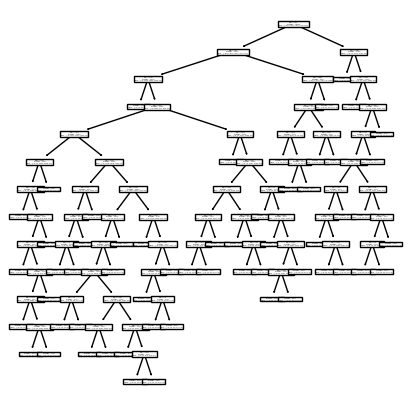

In [238]:
from sklearn import tree
from matplotlib import pyplot as plt

#Create Tree Classifier
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(x_train, y_train)

plt.figure(figsize=(5, 5), dpi=100)
tree.plot_tree(class_tree, label='all', feature_names=('GDP per Capita', 'Population'), proportion=True)

y_pred = class_tree.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of GDP Tree Classifier:", "{:.2f}%".format(accuracy*100))
final_data[1][1] = "{:.2f}%".format(accuracy*100)
pd.DataFrame(final_data)

## Now creating a Random Forest Classifier

In [239]:
from sklearn.ensemble import RandomForestClassifier as rfc

#Create Forest Classifier
class_forest = rfc(n_estimators=50, max_leaf_nodes=15)
class_forest = class_forest.fit(x_train, y_train)

#Create Prediction Data
y_pred_forest = class_forest.predict(x_test)

score = accuracy_score(y_test, y_pred_forest)
print('The accuracy of the GDP Forest model is: ', "{:.2f}%".format(100*score))
final_data[2][1] = "{:.2f}%".format(score*100)
pd.DataFrame(final_data)

The accuracy of the GDP Forest model is:  60.47%


,0,1,2,3
0,ML Model,GDP Per Capita,Infant Mortality Rate,Life Expectancy
1,Decision Tree,58.14%,None,None
2,Random Forest,60.47%,None,None


This indicates that GDP and Population are not significantly related to the food scarcity/surplus because training was not extremely successful. 

## Now training 2 models on Infant Mortality Rate and Population to see how it compares

In [240]:
x = x_df.filter(items=('Infant Mortality Rate', 'Population'))

#Create training data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Accuracy of Infant Mortality Rate Tree Classifier: 60.47%


,0,1,2,3
0,ML Model,GDP Per Capita,Infant Mortality Rate,Life Expectancy
1,Decision Tree,58.14%,60.47%,None
2,Random Forest,60.47%,None,None


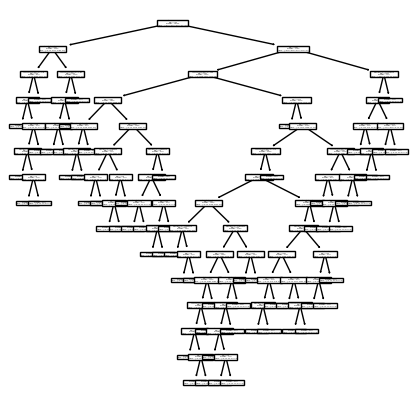

In [241]:
from sklearn import tree
from matplotlib import pyplot as plt

#Create Tree Classifier
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(x_train, y_train)

plt.figure(figsize=(5, 5), dpi=100)
tree.plot_tree(class_tree, label='all', feature_names=('Infant Mortality Rate', 'Population'), proportion=True)

y_pred = class_tree.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Infant Mortality Rate Tree Classifier:", "{:.2f}%".format(accuracy*100))
final_data[1][2] = "{:.2f}%".format(accuracy*100)
pd.DataFrame(final_data)

And the Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier as rfc

#Create Forest Classifier
class_forest = rfc(n_estimators=50, max_leaf_nodes=15)
class_forest = class_forest.fit(x_train, y_train)

#Create Prediction Data
y_pred_forest = class_forest.predict(x_test)

score = accuracy_score(y_test, y_pred_forest)
print('The accuracy of the GDP Forest model is: ', "{:.2f}%".format(100*score))
final_data[2][2] = "{:.2f}%".format(score*100)
pd.DataFrame(final_data)

The accuracy of the GDP Forest model is:  58.14%


,0,1,2,3
0,ML Model,GDP Per Capita,Infant Mortality Rate,Life Expectancy
1,Decision Tree,58.14%,60.47%,None
2,Random Forest,60.47%,58.14%,None


Infant Mortality Rate performs slightly worse at predicting food scarcity / surplus

## Now training 2 models on Life Expectancy and Population to see how it compares

In [243]:
x = x_df.filter(items=('Life Expectancy', 'Population'))

#Create training data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Accuracy of Infant Mortality Rate Tree Classifier: 44.19%


,0,1,2,3
0,ML Model,GDP Per Capita,Infant Mortality Rate,Life Expectancy
1,Decision Tree,58.14%,60.47%,44.19%
2,Random Forest,60.47%,58.14%,None


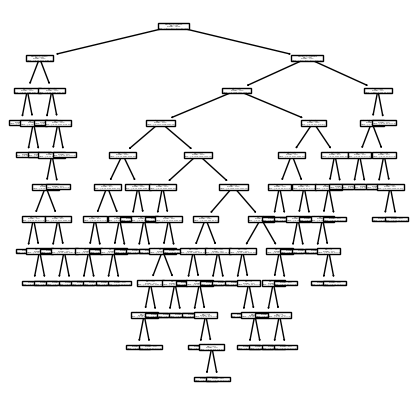

In [244]:
from sklearn import tree
from matplotlib import pyplot as plt

#Create Tree Classifier
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(x_train, y_train)

plt.figure(figsize=(5, 5), dpi=100)
tree.plot_tree(class_tree, label='all', feature_names=('Infant Mortality Rate', 'Population'), proportion=True)

y_pred = class_tree.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Infant Mortality Rate Tree Classifier:", "{:.2f}%".format(accuracy*100))
final_data[1][3] = "{:.2f}%".format(accuracy*100)
pd.DataFrame(final_data)

Amd Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier as rfc

#Create Forest Classifier
class_forest = rfc(n_estimators=50, max_leaf_nodes=15)
class_forest = class_forest.fit(x_train, y_train)

#Create Prediction Data
y_pred_forest = class_forest.predict(x_test)

score = accuracy_score(y_test, y_pred_forest)
print('The accuracy of the GDP Forest model is: ', "{:.2f}%".format(100*score))
final_data[2][3] = "{:.2f}%".format(score*100)
pd.DataFrame(final_data)

The accuracy of the GDP Forest model is:  55.81%


,0,1,2,3
0,ML Model,GDP Per Capita,Infant Mortality Rate,Life Expectancy
1,Decision Tree,58.14%,60.47%,44.19%
2,Random Forest,60.47%,58.14%,55.81%
